<a href="https://colab.research.google.com/github/Raavvone/Internship_Projects/blob/main/Ola_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OLA CASE STUDY ANALYSIS**

# Problem Statemnet:

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates. As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

# Objective:

Analyze the given driver dataset to understand:

*   Which factors contribute to drivers leaving the platform.
*   How demographic, income, rating, and trip data relate to attrition.
*   What insights Ola can use to reduce churn and improve retention.

# Data Structure and Overview

In [1]:
import pandas as pd # importing pandas for analysis

In [2]:
# First look of the dataset

df= pd.read_csv("/content/ola_driver.csv")
df

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


# Dataset Shape

In [3]:
df.shape

(19104, 14)

The dataset has 19,104 rows and 14 columns.

# Data Types of Each Column

In [6]:
df.dtypes

,0
Unnamed: 0,int64
MMM-YY,object
Driver_ID,int64
Age,float64
Gender,float64
City,object
Education_Level,int64
Income,int64
Dateofjoining,object
LastWorkingDate,object


Most of the columns have integer, float and String data types.

# Missing Value Summary

In [7]:
df.isna().sum()

,0
Unnamed: 0,0
MMM-YY,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488



*   Age has 61 missing values
*   Gender has 52 missing values
*   LastWorkingDate has 17,488 missing values

# Descriptive Statistics:

In [8]:
df.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


This table shows the mean, min, max, count and standard deviation of all the numeric columns of the dataset

# Unique Drivers

In [14]:

unique_drivers=len(df["Driver_ID"].unique())

In [15]:
print(unique_drivers)

2381


So there are 2381 unique drivers that are there

# Temporal Analysis:

In [20]:
# converting 'Dateofjoining' and 'LastWorkingDate' into datetime format
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])


converting 'Dateofjoining' and 'LastWorkingDate' into datetime format

In [22]:
# Count drivers joined each month
joined = df['Dateofjoining'].dt.to_period('M').value_counts().sort_index()
joined_df = joined.reset_index()
joined_df.columns = ['Month', 'Drivers Joined']


print("Drivers Joined Each Month:\n", joined_df)

Drivers Joined Each Month:
       Month  Drivers Joined
0   2013-04              31
1   2013-05              24
2   2013-06              59
3   2013-07              63
4   2013-08              33
..      ...             ...
80  2020-08             325
81  2020-09             314
82  2020-10             139
83  2020-11              93
84  2020-12              59

[85 rows x 2 columns]


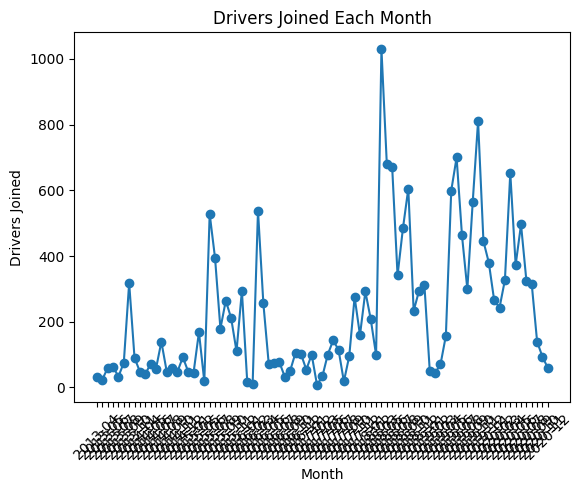

In [47]:
import matplotlib.pyplot as plt

# Convert 'Month' column to string for plotting
joined_df['Month'] = joined_df['Month'].astype(str)

plt.plot(joined_df['Month'], joined_df['Drivers Joined'], marker='o')
plt.title('Drivers Joined Each Month')
plt.xlabel('Month')
plt.ylabel('Drivers Joined')
plt.xticks(rotation=45)
plt.show()

In [23]:
# Count drivers left each month
left = df['LastWorkingDate'].dropna().dt.to_period('M').value_counts().sort_index()
left_df = left.reset_index()
left_df.columns = ['Month', 'Drivers Left']

print("\nDrivers Left Each Month:\n", left_df)


Drivers Left Each Month:
       Month  Drivers Left
0   2018-12             5
1   2019-01            82
2   2019-02            85
3   2019-03            75
4   2019-04            49
5   2019-05            98
6   2019-06            61
7   2019-07            48
8   2019-08            53
9   2019-09            79
10  2019-10            70
11  2019-11            69
12  2019-12            56
13  2020-01            70
14  2020-02            70
15  2020-03            58
16  2020-04            42
17  2020-05            63
18  2020-06            77
19  2020-07           141
20  2020-08             4
21  2020-09            66
22  2020-10            62
23  2020-11            73
24  2020-12            60


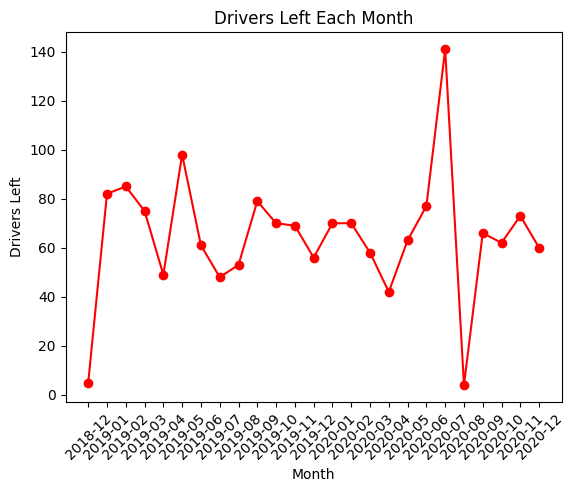

In [46]:
plt.plot(left_df['Month'].astype(str), left_df['Drivers Left'], marker='o', color='red')
plt.title('Drivers Left Each Month')
plt.xlabel('Month')
plt.ylabel('Drivers Left')
plt.xticks(rotation=45)
plt.show()

# Average Tenure of Drivers who left

In [24]:
# Tenure for drivers who left
df['tenure_days'] = (df['LastWorkingDate'] - df['Dateofjoining']).dt.days
avg_tenure_left = df['tenure_days'].mean()
print(f"Average tenure of drivers who left: {avg_tenure_left:.2f} days")

Average tenure of drivers who left: 357.57 days


# Average Tenure of all the Drivers

In [28]:
# Tenure for all drivers (active + left)
today = pd.Timestamp.today()
df['tenure_all'] = (df['LastWorkingDate'].fillna(today) - df['Dateofjoining']).dt.days
avg_tenure_all = df['tenure_all'].mean()
print(f"Average tenure of all drivers: {avg_tenure_all:.2f} days")

Average tenure of all drivers: 2464.06 days


# Feature Engineering

In [40]:
# Creating target column: 1 if driver left, 0 if still working
df['Left'] = df['LastWorkingDate'].notna().astype(int)

In [41]:
# Sample data
print(df[['Driver_ID', 'Dateofjoining', 'LastWorkingDate', 'Left']].head())

   Driver_ID Dateofjoining LastWorkingDate  Left
0          1    2018-12-24             NaT     0
1          1    2018-12-24             NaT     0
2          1    2018-12-24      2019-03-11     1
3          2    2020-11-06             NaT     0
4          2    2020-11-06             NaT     0


In [42]:
# Count of left vs active
print("\nLeft (1) vs Active (0) drivers:")
print(df['Left'].value_counts())


Left (1) vs Active (0) drivers:
Left
0    17488
1     1616
Name: count, dtype: int64


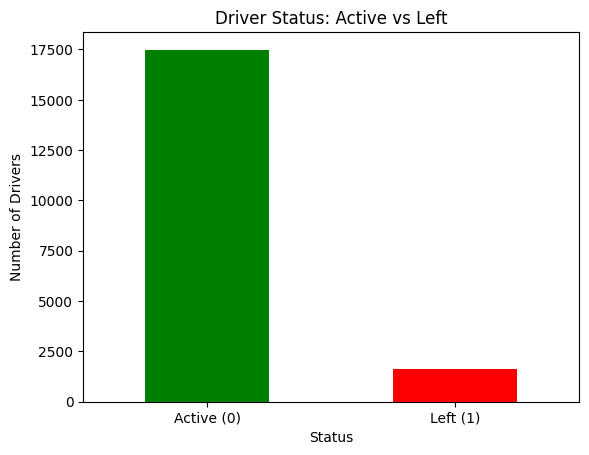

In [45]:
# Bar chart for Left vs Active
df['Left'].value_counts().sort_index().plot(kind='bar', color=['green', 'red'])
plt.xticks([0, 1], ['Active (0)', 'Left (1)'], rotation=0)
plt.title('Driver Status: Active vs Left')
plt.xlabel('Status')
plt.ylabel('Number of Drivers')
plt.show()

In [57]:
# Remove exact duplicate rows
df = df.drop_duplicates()

# Optional: reset index after dropping
df = df.reset_index(drop=True)

# Check the cleaned data
print(df.head())

   Unnamed: 0    MMM-YY  Driver_ID   Age  Gender City  Education_Level  \
0           0  01/01/19          1  28.0     0.0  C23                2   
1           1  02/01/19          1  28.0     0.0  C23                2   
2           2  03/01/19          1  28.0     0.0  C23                2   
3           3  11/01/20          2  31.0     0.0   C7                2   
4           4  12/01/20          2  31.0     0.0   C7                2   

   Income Dateofjoining LastWorkingDate  ...  Day_of_Week_Joining  \
0   57387    2018-12-24             NaT  ...                    0   
1   57387    2018-12-24             NaT  ...                    0   
2   57387    2018-12-24      2019-03-11  ...                    0   
3   67016    2020-11-06             NaT  ...                    4   
4   67016    2020-11-06             NaT  ...                    4   

   Quarter_of_Joining  Tenure_Group_Left  Tenure_Group_All  Year_Joining  \
0                   4                NaN          >3 Years      

In [63]:
# Show duplicates based on Driver_ID and Dateofjoining
duplicates = df[df.duplicated(subset=['Driver_ID', 'Dateofjoining'])]
print(duplicates)

       Unnamed: 0    MMM-YY  Driver_ID   Age  Gender City  Education_Level  \
1               1  02/01/19          1  28.0     0.0  C23                2   
2               2  03/01/19          1  28.0     0.0  C23                2   
4               4  12/01/20          2  31.0     0.0   C7                2   
6               6  01/01/20          4  43.0     0.0  C13                2   
7               7  02/01/20          4  43.0     0.0  C13                2   
...           ...       ...        ...   ...     ...  ...              ...   
19099       19099  08/01/20       2788  30.0     0.0  C27                2   
19100       19100  09/01/20       2788  30.0     0.0  C27                2   
19101       19101  10/01/20       2788  30.0     0.0  C27                2   
19102       19102  11/01/20       2788  30.0     0.0  C27                2   
19103       19103  12/01/20       2788  30.0     0.0  C27                2   

       Income Dateofjoining LastWorkingDate  ...  Day_of_Week_J

In [64]:
# Show all duplicate rows
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Unnamed: 0, MMM-YY, Driver_ID, Age, Gender, City, Education_Level, Income, Dateofjoining, LastWorkingDate, Joining Designation, Grade, Total Business Value, Quarterly Rating, tenure, current_tenure, tenure_days, tenure_all, Left, Year_of_Joining, Month_of_Joining, Day_of_Week_Joining, Quarter_of_Joining, Tenure_Group_Left, Tenure_Group_All, Year_Joining, Month_Joining, DayOfWeek_Joining, Quarter_Joining, TenureGroup_Left, TenureGroup_All]
Index: []

[0 rows x 31 columns]


In [66]:
# 1. Year, Month, Day of Week, Quarter from joining date
df['Year_Joining'] = df['Dateofjoining'].dt.year
df['Month_Joining'] = df['Dateofjoining'].dt.month
df['DayOfWeek_Joining'] = df['Dateofjoining'].dt.dayofweek  # 0 = Monday
df['Quarter_Joining'] = df['Dateofjoining'].dt.quarter

df_unique = df.drop_duplicates(subset=['Driver_ID', 'Dateofjoining'])
print(df_unique[['Driver_ID', 'Dateofjoining', 'Year_Joining', 'Month_Joining', 'DayOfWeek_Joining', 'Quarter_Joining']].head())


    Driver_ID Dateofjoining  Year_Joining  Month_Joining  DayOfWeek_Joining  \
0           1    2018-12-24          2018             12                  0   
3           2    2020-11-06          2020             11                  4   
5           4    2019-12-07          2019             12                  5   
10          5    2019-01-09          2019              1                  2   
13          6    2020-07-31          2020              7                  4   

    Quarter_Joining  
0                 4  
3                 4  
5                 4  
10                1  
13                3  


In [61]:
# 2. Tenure group for drivers who left (based on days worked)
tenure_bins = [0, 90, 180, 365, 730, df['tenure_days'].max()]
tenure_labels = ['<3 Months', '3-6 Months', '6-12 Months', '1-2 Years', '>2 Years']
df['TenureGroup_Left'] = pd.cut(df['tenure_days'], bins=tenure_bins, labels=tenure_labels, right=False)

print(df['TenureGroup_Left'].value_counts(dropna=False))


TenureGroup_Left
NaN            17489
3-6 Months       475
6-12 Months      359
<3 Months        349
1-2 Years        222
>2 Years         210
Name: count, dtype: int64


In [62]:
# 3. Tenure group for all drivers (including active ones)
tenure_bins_all = [0, 90, 180, 365, 730, 1095, df['tenure_all'].max()]
tenure_labels_all = ['<3 Months', '3-6 Months', '6-12 Months', '1-2 Years', '2-3 Years', '>3 Years']
df['TenureGroup_All'] = pd.cut(df['tenure_all'], bins=tenure_bins_all, labels=tenure_labels_all, right=False)

print(df['TenureGroup_All'].value_counts(dropna=False))


TenureGroup_All
>3 Years       17600
3-6 Months       475
6-12 Months      359
<3 Months        349
1-2 Years        222
2-3 Years         75
NaN               24
Name: count, dtype: int64
